# ИУ5-25М Андреев А.В.

# Вариант 1

# Рубежный контроль №1

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

### Загрузка и предобработка данных

In [2]:
# Будем использовать только обучающую выборку
data_loaded = pd.read_csv('world-happiness-report-2021.csv', sep=",")
# размер набора данных
data_loaded.shape

(149, 20)

In [3]:
data_loaded.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Country name', ('object', 0)),
 ('Regional indicator', ('object', 0)),
 ('Ladder score', ('float64', 0)),
 ('Standard error of ladder score', ('float64', 0)),
 ('upperwhisker', ('float64', 0)),
 ('lowerwhisker', ('float64', 0)),
 ('Logged GDP per capita', ('float64', 0)),
 ('Social support', ('float64', 0)),
 ('Healthy life expectancy', ('float64', 0)),
 ('Freedom to make life choices', ('float64', 0)),
 ('Generosity', ('float64', 0)),
 ('Perceptions of corruption', ('float64', 0)),
 ('Ladder score in Dystopia', ('float64', 0)),
 ('Explained by: Log GDP per capita', ('float64', 0)),
 ('Explained by: Social support', ('float64', 0)),
 ('Explained by: Healthy life expectancy', ('float64', 0)),
 ('Explained by: Freedom to make life choices', ('float64', 0)),
 ('Explained by: Generosity', ('float64', 0)),
 ('Explained by: Perceptions of corruption', ('float64', 0)),
 ('Dystopia + residual', ('float64', 0))]

In [5]:
# Используем только некоторые признаки
cols_filter = ['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker', 'lowerwhisker',
        'Explained by: Social support', 'Explained by: Freedom to make life choices']
data = data_loaded[cols_filter]
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Explained by: Social support,Explained by: Freedom to make life choices
0,Finland,Western Europe,7.842,7.904,7.780,1.106,0.691
1,Denmark,Western Europe,7.620,7.687,7.552,1.108,0.686
2,Switzerland,Western Europe,7.571,7.643,7.500,1.079,0.653
3,Iceland,Western Europe,7.554,7.670,7.438,1.172,0.698
4,Netherlands,Western Europe,7.464,7.518,7.410,1.079,0.647


## Задача №1

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".


In [6]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [7]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [8]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['Country name'])])

In [9]:
data_COUNT_ENC

,Explained by: Freedom to make life choices,Explained by: Social support,Ladder score,Regional indicator,lowerwhisker,upperwhisker
0,0.691,1.106,7.842,21,7.780,7.904
1,0.686,1.108,7.620,21,7.552,7.687
2,0.653,1.079,7.571,21,7.500,7.643
3,0.698,1.172,7.554,21,7.438,7.670
4,0.647,1.079,7.464,21,7.410,7.518
...,...,...,...,...,...,...
144,0.405,0.731,3.512,36,3.276,3.748
145,0.539,0.724,3.467,36,3.322,3.611
146,0.627,0.202,3.415,36,3.282,3.548
147,0.359,0.649,3.145,36,3.030,3.259


In [10]:
data['Ladder score'].unique()

array([7.842, 7.62 , 7.571, 7.554, 7.464, 7.392, 7.363, 7.324, 7.277,
       7.268, 7.183, 7.157, 7.155, 7.103, 7.085, 7.069, 7.064, 6.965,
       6.951, 6.834, 6.69 , 6.647, 6.602, 6.584, 6.561, 6.494, 6.491,
       6.483, 6.461, 6.435, 6.431, 6.377, 6.372, 6.331, 6.33 , 6.317,
       6.309, 6.255, 6.223, 6.189, 6.18 , 6.179, 6.172, 6.166, 6.152,
       6.14 , 6.106, 6.078, 6.061, 6.049, 6.032, 6.012, 5.992, 5.985,
       5.972, 5.94 , 5.929, 5.919, 5.882, 5.88 , 5.845, 5.84 , 5.813,
       5.766, 5.764, 5.744, 5.723, 5.716, 5.677, 5.653, 5.581, 5.545,
       5.536, 5.534, 5.477, 5.466, 5.411, 5.41 , 5.384, 5.345, 5.342,
       5.339, 5.306, 5.283, 5.269, 5.266, 5.198, 5.171, 5.142, 5.132,
       5.117, 5.101, 5.088, 5.074, 5.066, 5.051, 5.045, 5.03 , 5.025,
       4.984, 4.956, 4.948, 4.934, 4.918, 4.892, 4.891, 4.887, 4.875,
       4.854, 4.852, 4.834, 4.83 , 4.794, 4.759, 4.723, 4.721, 4.636,
       4.625, 4.607, 4.596, 4.584, 4.574, 4.517, 4.426, 4.395, 4.355,
       4.325, 4.308,

In [11]:
data_COUNT_ENC['Ladder score'].unique()

array([7.842, 7.62 , 7.571, 7.554, 7.464, 7.392, 7.363, 7.324, 7.277,
       7.268, 7.183, 7.157, 7.155, 7.103, 7.085, 7.069, 7.064, 6.965,
       6.951, 6.834, 6.69 , 6.647, 6.602, 6.584, 6.561, 6.494, 6.491,
       6.483, 6.461, 6.435, 6.431, 6.377, 6.372, 6.331, 6.33 , 6.317,
       6.309, 6.255, 6.223, 6.189, 6.18 , 6.179, 6.172, 6.166, 6.152,
       6.14 , 6.106, 6.078, 6.061, 6.049, 6.032, 6.012, 5.992, 5.985,
       5.972, 5.94 , 5.929, 5.919, 5.882, 5.88 , 5.845, 5.84 , 5.813,
       5.766, 5.764, 5.744, 5.723, 5.716, 5.677, 5.653, 5.581, 5.545,
       5.536, 5.534, 5.477, 5.466, 5.411, 5.41 , 5.384, 5.345, 5.342,
       5.339, 5.306, 5.283, 5.269, 5.266, 5.198, 5.171, 5.142, 5.132,
       5.117, 5.101, 5.088, 5.074, 5.066, 5.051, 5.045, 5.03 , 5.025,
       4.984, 4.956, 4.948, 4.934, 4.918, 4.892, 4.891, 4.887, 4.875,
       4.854, 4.852, 4.834, 4.83 , 4.794, 4.759, 4.723, 4.721, 4.636,
       4.625, 4.607, 4.596, 4.584, 4.574, 4.517, 4.426, 4.395, 4.355,
       4.325, 4.308,

In [12]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['Country name'])])

In [13]:
data_FREQ_ENC

,Explained by: Freedom to make life choices,Explained by: Social support,Ladder score,Regional indicator,lowerwhisker,upperwhisker
0,0.691,1.106,7.842,0.140940,7.780,7.904
1,0.686,1.108,7.620,0.140940,7.552,7.687
2,0.653,1.079,7.571,0.140940,7.500,7.643
3,0.698,1.172,7.554,0.140940,7.438,7.670
4,0.647,1.079,7.464,0.140940,7.410,7.518
...,...,...,...,...,...,...
144,0.405,0.731,3.512,0.241611,3.276,3.748
145,0.539,0.724,3.467,0.241611,3.322,3.611
146,0.627,0.202,3.415,0.241611,3.282,3.548
147,0.359,0.649,3.145,0.241611,3.030,3.259


In [14]:
data_FREQ_ENC['Ladder score'].unique()

array([7.842, 7.62 , 7.571, 7.554, 7.464, 7.392, 7.363, 7.324, 7.277,
       7.268, 7.183, 7.157, 7.155, 7.103, 7.085, 7.069, 7.064, 6.965,
       6.951, 6.834, 6.69 , 6.647, 6.602, 6.584, 6.561, 6.494, 6.491,
       6.483, 6.461, 6.435, 6.431, 6.377, 6.372, 6.331, 6.33 , 6.317,
       6.309, 6.255, 6.223, 6.189, 6.18 , 6.179, 6.172, 6.166, 6.152,
       6.14 , 6.106, 6.078, 6.061, 6.049, 6.032, 6.012, 5.992, 5.985,
       5.972, 5.94 , 5.929, 5.919, 5.882, 5.88 , 5.845, 5.84 , 5.813,
       5.766, 5.764, 5.744, 5.723, 5.716, 5.677, 5.653, 5.581, 5.545,
       5.536, 5.534, 5.477, 5.466, 5.411, 5.41 , 5.384, 5.345, 5.342,
       5.339, 5.306, 5.283, 5.269, 5.266, 5.198, 5.171, 5.142, 5.132,
       5.117, 5.101, 5.088, 5.074, 5.066, 5.051, 5.045, 5.03 , 5.025,
       4.984, 4.956, 4.948, 4.934, 4.918, 4.892, 4.891, 4.887, 4.875,
       4.854, 4.852, 4.834, 4.83 , 4.794, 4.759, 4.723, 4.721, 4.636,
       4.625, 4.607, 4.596, 4.584, 4.574, 4.517, 4.426, 4.395, 4.355,
       4.325, 4.308,

## Задача №21

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

In [29]:
iris_dataset = load_iris()
data = pd.DataFrame(iris_dataset.data,
                      columns=iris_dataset.feature_names)
data['Y'] = iris_dataset.target
data.shape

(150, 5)

In [30]:
# Нужно ли масштабирование
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [32]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [33]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((120, 4), (30, 4))

In [34]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [35]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [36]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [39]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [40]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.114667,-1.691429e-01,-0.067111
std,0.636974,0.871733,5.043709e-01,0.508158
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


In [41]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

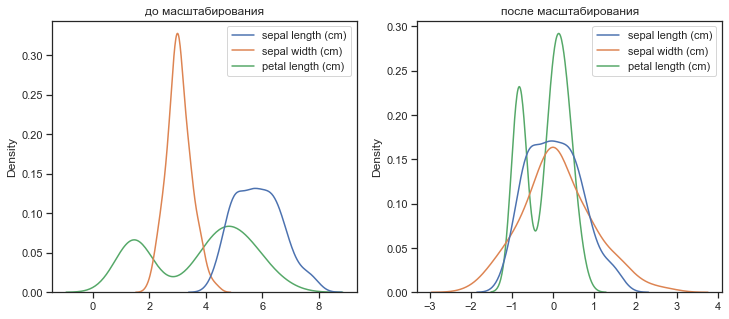

In [43]:
draw_kde(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

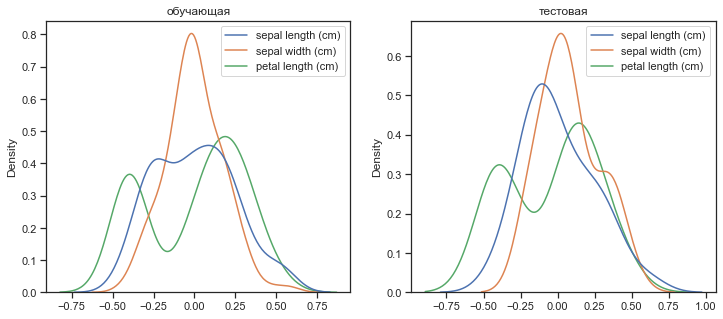

In [45]:
draw_kde(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

## Доп задание

Для произвольной колонки данных построить парные диаграммы (pairplot).

D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estima

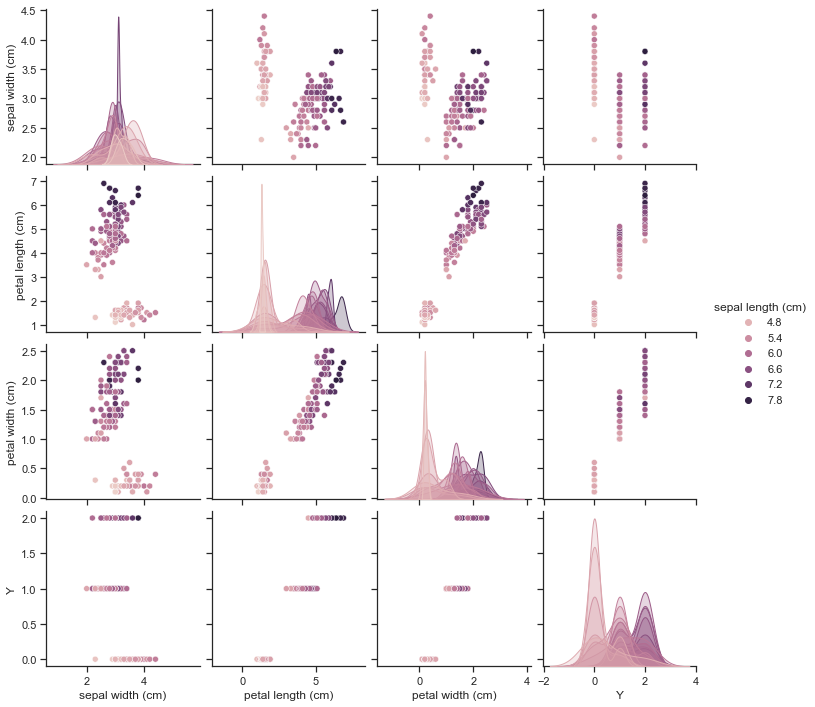

In [47]:
sns.pairplot(data, hue='sepal length (cm)')

D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


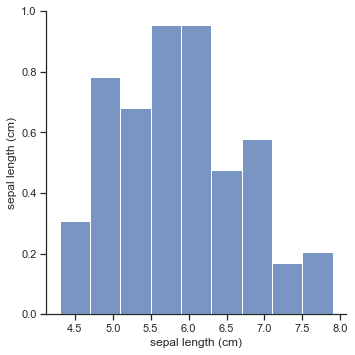

In [49]:
data_tmp = pd.DataFrame(data['sepal length (cm)'])
sns.pairplot(data_tmp, size=5)